# Simple regression with TensorFlow

Progressive example working through various network set ups

https://towardsdatascience.com/training-neural-networks-for-price-prediction-with-tensorflow-8aafe0c55198

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.1


In [3]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [4]:
X = np.load("./rbfs/phi_reduce.npy")
y = np.load("./rbfs/y.npy")

In [16]:
y.min()

-0.001

(array([2.8090e+03, 4.0340e+03, 9.2550e+03, 1.3645e+04, 1.2332e+04,
        7.3420e+03, 2.0200e+03, 3.2900e+02, 4.8000e+01, 7.0000e+00]),
 array([-0.001 ,  0.0094,  0.0198,  0.0302,  0.0406,  0.051 ,  0.0614,
         0.0718,  0.0822,  0.0926,  0.103 ]),
 <BarContainer object of 10 artists>)

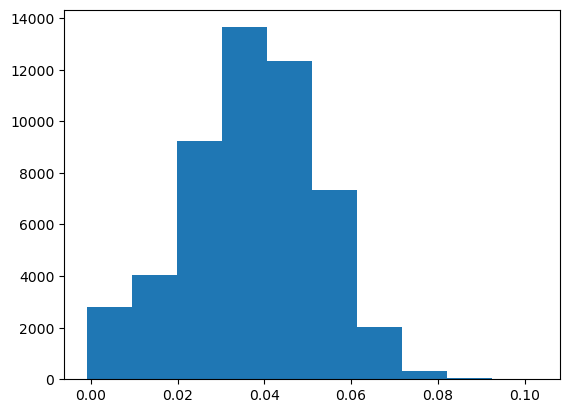

In [5]:
plt.hist(y)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8, random_state=42)

## TensorFlow

In [7]:
# Set random seed
tf.random.set_seed(42)
from keras import Sequential
from keras import models
from keras import layers

In [8]:
n_feat = X_train.shape[1]

### Model 1 (Simple TF regression)

In [9]:
model = models.Sequential([
  layers.Dense(512, activation='relu', input_shape=(n_feat,)),
  layers.Dense(512, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='linear')
], name="Initial_model")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               103424    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 596225 (2.27 MB)
Trainable params: 596225 

In [11]:
# Compile the model
model.compile(loss='mae', metrics=['mae', 'mse'], optimizer='adam')

In [12]:
history=model.fit(X_train, y_train, epochs=200, 
                  batch_size=1024, verbose=1, 
                  validation_split=0.2)

Epoch 1/200
33/33 [==============================] - 1s 17ms/step - loss: 0.0336 - mae: 0.0336 - mse: 0.0043 - val_loss: 0.0104 - val_mae: 0.0104 - val_mse: 1.7484e-04
Epoch 2/200
33/33 [==============================] - 0s 14ms/step - loss: 0.0104 - mae: 0.0104 - mse: 1.7536e-04 - val_loss: 0.0101 - val_mae: 0.0101 - val_mse: 1.6575e-04
Epoch 3/200
33/33 [==============================] - 0s 14ms/step - loss: 0.0102 - mae: 0.0102 - mse: 1.6948e-04 - val_loss: 0.0100 - val_mae: 0.0100 - val_mse: 1.6536e-04
Epoch 4/200
33/33 [==============================] - 0s 14ms/step - loss: 0.0102 - mae: 0.0102 - mse: 1.6954e-04 - val_loss: 0.0101 - val_mae: 0.0101 - val_mse: 1.6290e-04
Epoch 5/200
33/33 [==============================] - 1s 15ms/step - loss: 0.0102 - mae: 0.0102 - mse: 1.6879e-04 - val_loss: 0.0101 - val_mae: 0.0101 - val_mse: 1.6280e-04
Epoch 6/200
33/33 [==============================] - 1s 16ms/step - loss: 0.0102 - mae: 0.0102 - mse: 1.6771e-04 - val_loss: 0.0101 - val_mae: 0

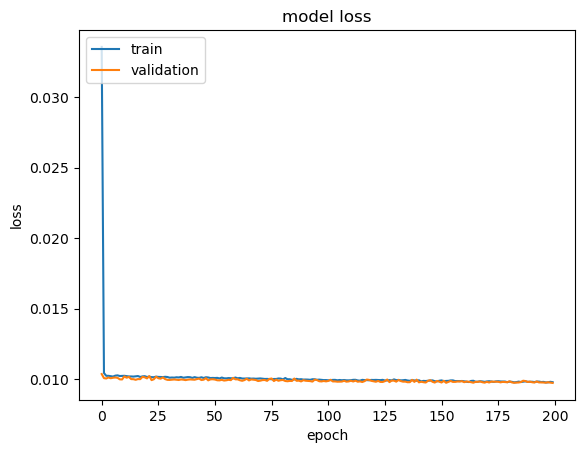

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
y_test_pred = model.predict(X_test)
mean_absolute_error(y_test, y_test_pred)

324/324 [==============================] - 0s 1ms/step


0.00986597657352614

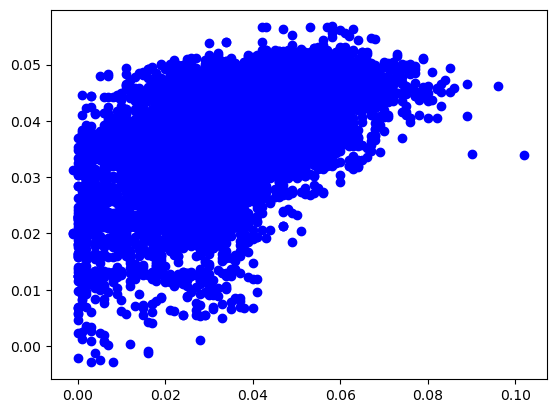

In [15]:
plt.plot(y_test, y_test_pred, 'bo')

### Regularization with drop-outs

In [19]:
model = models.Sequential([
  layers.Dense(512, activation='relu', input_shape=(n_feat,)),
  layers.Dropout(0.2),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='linear')
], name="Dropout")
model.summary()

Model: "Dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               103424    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               6579

In [20]:
# Compile the model
model.compile(loss='mae', metrics=['mae', 'mse'], optimizer='adam')

In [21]:
history=model.fit(X_train, y_train, epochs=200, 
                  batch_size=1024, verbose=1, 
                  validation_split=0.2)

Epoch 1/200
33/33 [==============================] - 1s 26ms/step - loss: 0.0448 - mae: 0.0448 - mse: 0.0095 - val_loss: 0.0142 - val_mae: 0.0142 - val_mse: 2.8523e-04
Epoch 2/200
33/33 [==============================] - 1s 20ms/step - loss: 0.0117 - mae: 0.0117 - mse: 2.1643e-04 - val_loss: 0.0127 - val_mae: 0.0127 - val_mse: 2.3466e-04
Epoch 3/200
33/33 [==============================] - 1s 20ms/step - loss: 0.0110 - mae: 0.0110 - mse: 1.9474e-04 - val_loss: 0.0119 - val_mae: 0.0119 - val_mse: 2.0849e-04
Epoch 4/200
33/33 [==============================] - 1s 20ms/step - loss: 0.0108 - mae: 0.0108 - mse: 1.8627e-04 - val_loss: 0.0111 - val_mae: 0.0111 - val_mse: 1.8465e-04
Epoch 5/200
33/33 [==============================] - 1s 20ms/step - loss: 0.0107 - mae: 0.0107 - mse: 1.8260e-04 - val_loss: 0.0108 - val_mae: 0.0108 - val_mse: 1.7862e-04
Epoch 6/200
33/33 [==============================] - 1s 20ms/step - loss: 0.0106 - mae: 0.0106 - mse: 1.7892e-04 - val_loss: 0.0107 - val_mae: 0

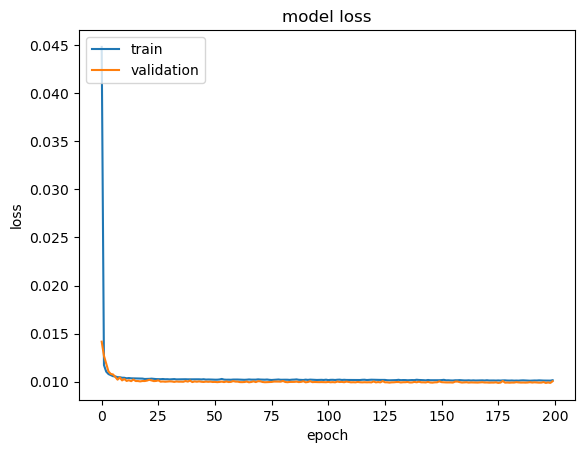

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

324/324 [==============================] - 0s 920us/step
0.01012559045652764


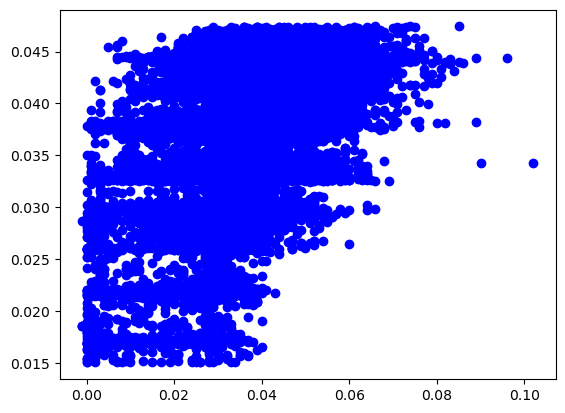

In [24]:
y_test_pred = model.predict(X_test)
print(mean_absolute_error(y_test, y_test_pred))
plt.plot(y_test, y_test_pred, 'bo')